# Numerical Simulation Laboratory

## Notebook 06

## Exercise 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Eqilibration of the system

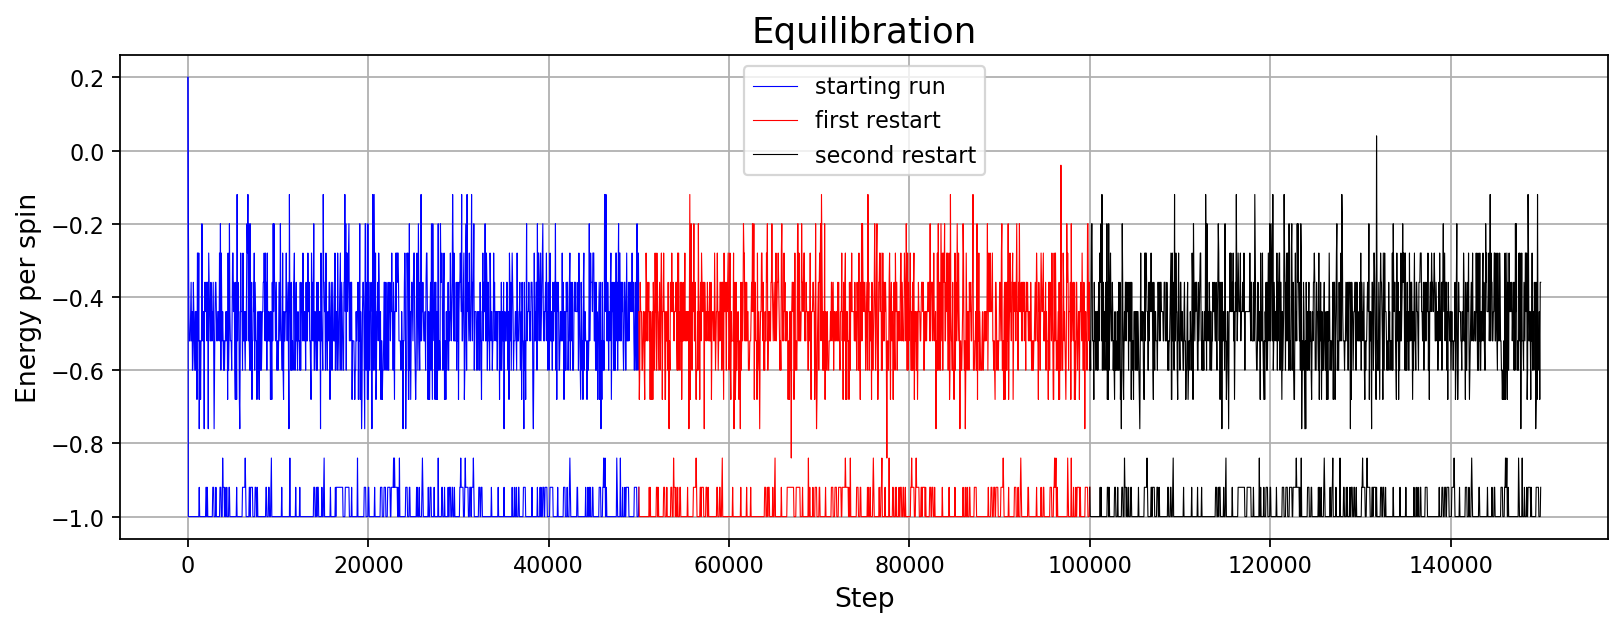

In [5]:
#T=0.5
data = np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/T=0.5/eq1.txt").T
data2 = np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/T=0.5/eq2.txt").T
data3 = np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/T=0.5/eq3.txt").T
fig = plt.figure(figsize=(12, 4), dpi=160)
plt.plot(data[0], data[1], 'b-', label="starting run", lw = 0.5)
plt.plot(data2[0]+50000, data2[1], 'r-', label="first restart", lw = 0.5)
plt.plot(data3[0]+100000, data3[1], 'k-', label="second restart", lw = 0.5)
plt.grid(True)
plt.title("Equilibration", size=16)
plt.ylabel("Energy per spin", size=12)
plt.xlabel("Step", size=12)
plt.legend()

#T=2
data = np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/T=2/eq1.txt").T
data2 = np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/T=2/eq2.txt").T
data3 = np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/T=2/eq3.txt").T
plt.plot(data[0], data[1], 'b-', label="starting run", lw = 0.5)
plt.plot(data2[0]+50000, data2[1], 'r-', label="first restart", lw = 0.5)
plt.plot(data3[0]+100000, data3[1], 'k-', label="second restart", lw = 0.5)
plt.show()



### Measures

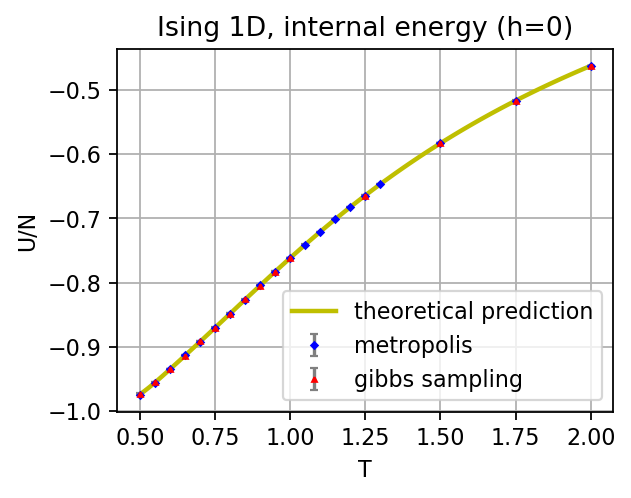

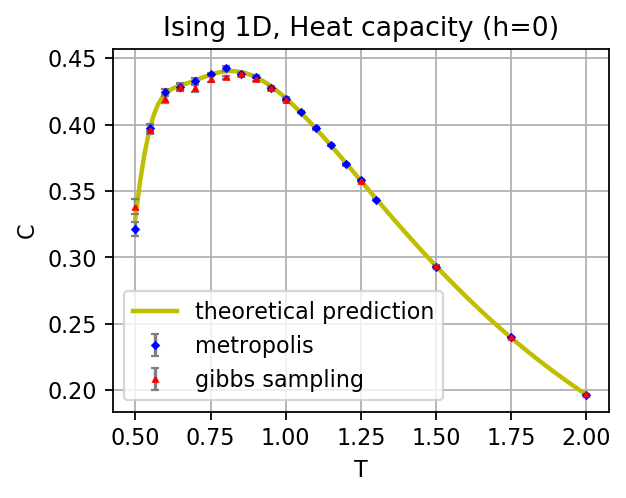

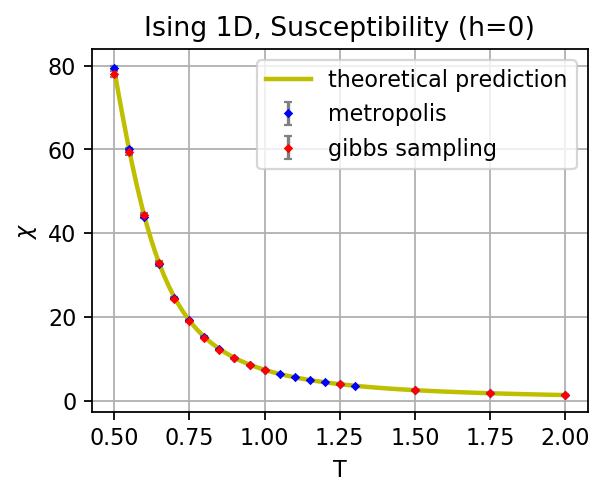

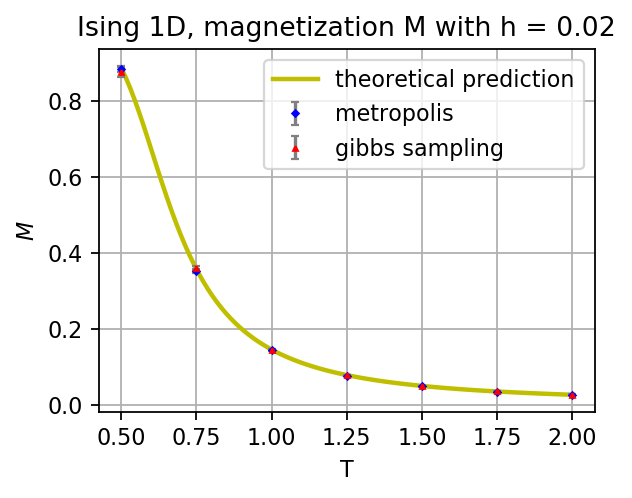

In [20]:
data = np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/measures/U_T.txt").T
data2 = np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/measures/C_T.txt").T
data3 = np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/measures/Chi_T.txt").T
data4 = np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/measures/Mag_T.txt").T
data5= np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/measures/GIBBS_U_T.txt").T
data6= np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/measures/GIBBS_C_T.txt").T
data7= np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/measures/GIBBS_Chi_T.txt").T
data8= np.loadtxt("/home/mattia/Scrivania/Numerical_Simulation_Laboratory/Exercises/EX6/ISING_1D/measures/GIBBS_Mag_T.txt").T
#Energy
#analytical curve
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
#metropolis
fig = plt.figure(figsize=(4, 3), dpi=160)
plt.plot(T, e, 'y-', label='theoretical prediction', lw=2)
plt.errorbar(data[0], data[1],yerr=data[2],color='b', ecolor = 'gray', 
             linestyle = 'none', marker ='D', ms=2, capsize=2, label='metropolis')
plt.errorbar(data5[0], data5[1],yerr=data5[2],color='r', ecolor = 'gray', 
             linestyle = 'none', marker ='^', ms=2, capsize=2, label='gibbs sampling')
plt.title('Ising 1D, internal energy (h=0)')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.grid(True)

#Heat capacity
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
fig = plt.figure(figsize=(4, 3), dpi=160)
plt.plot(T, heat, 'y-', label='theoretical prediction', lw=2)
plt.errorbar(data2[0], data2[1],yerr=data2[2],color='b', ecolor = 'gray', 
             linestyle = 'none', marker ='D', ms=2, capsize=2, label='metropolis')
plt.errorbar(data6[0], data6[1],yerr=data6[2],color='r', ecolor = 'gray', 
             linestyle = 'none', marker ='^', ms=2, capsize=2, label='gibbs sampling')
plt.title('Ising 1D, Heat capacity (h=0)')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.grid(True)

#Susceptibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
fig = plt.figure(figsize=(4, 3), dpi=160)
plt.plot(T, X, 'y-', label='theoretical prediction', lw=2)
plt.errorbar(data3[0], data3[1],yerr=data3[2],color='b', ecolor = 'gray', 
             linestyle = 'none', marker ='D', ms=2, capsize=2, label='metropolis')
plt.errorbar(data7[0], data7[1],yerr=data7[2],color='r', ecolor = 'gray', 
             linestyle = 'none', marker ='D', ms=2, capsize=2, label='gibbs sampling')
plt.title('Ising 1D, Susceptibility (h=0)')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.grid(True)
plt.legend()

#Magnetization
h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
fig = plt.figure(figsize=(4, 3), dpi=160)
plt.plot(T, M, 'y-', lw=2, label='theoretical prediction')
plt.errorbar(data4[0], data4[1],yerr=data4[2],color='b', ecolor = 'gray', 
             linestyle = 'none', marker ='D', ms=2, capsize=2, label='metropolis')
plt.errorbar(data8[0], data8[1],yerr=data8[2],color='r', ecolor = 'gray', 
             linestyle = 'none', marker ='^', ms=2, capsize=2, label='gibbs sampling')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend()
plt.grid(True)
plt.show()


plt.show()